## Battery Capacity Prediction Analysis
This notebook provides a comprehensive analysis of battery capacity prediction using various machine learning models.

## 1. Setup and Imports

In [12]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import joblib
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
from src.data_loader import DataLoader
from src.preprocessor import Preprocessor
from src.model_trainer import ModelTrainer
from src.evaluator import Evaluator
from sklearn.ensemble import RandomForestRegressor

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("All imports successful!")


All imports successful!


## 2. Initialize Paths and Directories


In [2]:
# Initialize paths
current_dir = Path.cwd()
data_path = current_dir / "dataset_299.xlsx"
models_dir = current_dir / "models"
results_dir = current_dir / "results"

# Create directories if they don't exist
models_dir.mkdir(exist_ok=True)
results_dir.mkdir(exist_ok=True)

print(f"Data path: {data_path}")
print(f"Models directory: {models_dir}")
print(f"Results directory: {results_dir}")
print(f"Data file exists: {data_path.exists()}")


Data path: /Users/amirbabamahmoudi/Documents/Battery-Capacity/dataset_299.xlsx
Models directory: /Users/amirbabamahmoudi/Documents/Battery-Capacity/models
Results directory: /Users/amirbabamahmoudi/Documents/Battery-Capacity/results
Data file exists: True


## 3. Data Loading and Exploration <a id="data-loading"></a>

In [3]:
# Load data
print("Loading data...")
data_loader = DataLoader(data_path)
df = data_loader.load_data()
X, y = data_loader.split_features_target(df)

print(f"Dataset shape: {df.shape}")
print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nFirst few rows of features:")
print(X.head())
print(f"\nTarget statistics:")
print(y.describe())


Loading data...
Successfully loaded data with shape: (299, 63)
Index(['Cell ID', 'Average Capacity'], dtype='object')
Dataset shape: (299, 63)
Features shape: (299, 61)
Target shape: (299,)

First few rows of features:
   Avg Cell Temp (°C)  1.3197 Hz RE  1.3197 Hz IM  1.6496 Hz RE  1.6496 Hz IM  \
0           27.627827      0.002720      0.000121      0.002639      0.000138   
1           28.678497      0.002982      0.000132      0.002898      0.000150   
2           29.713490      0.002553      0.000137      0.002510      0.000103   
3           29.969679      0.001928      0.000149      0.001931      0.000150   
4           27.678881      0.002315      0.000153      0.002307      0.000130   

   1.9795 Hz RE  1.9795 Hz IM  2.6394 Hz RE  2.6394 Hz IM  3.2992 Hz RE  ...  \
0      0.002586      0.000145      0.002612      0.000139      0.002629  ...   
1      0.002884      0.000173      0.002891      0.000164      0.002846  ...   
2      0.002509      0.000123      0.002530      0.000

In [4]:
# Explore data
data_loader.explore_data(df)



Dataset Overview:
--------------------------------------------------
Number of samples: 299
Number of features: 61

Feature Statistics:
            Cell ID  Average Capacity  Avg Cell Temp (°C)  1.3197 Hz RE  \
count  2.990000e+02        299.000000           97.000000    299.000000   
mean   2.022053e+11       7758.993925           28.909215      0.003350   
std    1.086995e+08        624.947969            1.507704      0.001487   
min    2.019092e+11       4106.476500           26.273455      0.001882   
25%    2.021083e+11       7617.600125           27.627827      0.002586   
50%    2.022052e+11       7879.671500           28.917746      0.002956   
75%    2.023020e+11       8123.505250           29.858487      0.003441   
max    2.024080e+11       8579.065042           33.445891      0.010253   

       1.3197 Hz IM  1.6496 Hz RE  1.6496 Hz IM  1.9795 Hz RE  1.9795 Hz IM  \
count    299.000000    299.000000    299.000000    299.000000    299.000000   
mean       0.000152      0.00

## 4. Data Splitting 

In [25]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print(f"Training set percentage: {X_train.shape[0] / len(X) * 100:.1f}%")
print(f"Test set percentage: {X_test.shape[0] / len(X) * 100:.1f}%")


Training set size: 209 samples
Test set size: 90 samples
Training set percentage: 69.9%
Test set percentage: 30.1%


## 5. Data Preprocessing <a id="preprocessing"></a>

In [26]:
# Preprocess data
print("Preprocessing data...")
preprocessor = Preprocessor(scaler_type='standard')

# Fit preprocessor on training data and transform both sets
X_train_processed, y_train_processed = preprocessor.preprocess_data(X_train, y_train, fit=True)
X_test_processed, y_test_processed = preprocessor.preprocess_data(X_test, y_test, fit=False)
X_all_processed, y_all_processed = preprocessor.preprocess_data(X, y, fit=False)

print(f"Processed training features shape: {X_train_processed.shape}")
print(f"Processed test features shape: {X_test_processed.shape}")
print("Preprocessing completed successfully!")
evaluator_all = Evaluator()
evaluator_all.analyze_capacity_distribution(y_all_processed)

Preprocessing data...
Processed training features shape: (209, 61)
Processed test features shape: (90, 61)
Preprocessing completed successfully!

Detailed Capacity Analysis:
--------------------------------------------------
Min capacity: 4106.48
Max capacity: 8579.07
Mean capacity: 7758.99
Median capacity: 7879.67

Value counts in each range:
≤ 7000: 21
7000-7400: 21
7400-8000: 156
8000-8500: 99
> 8500: 2


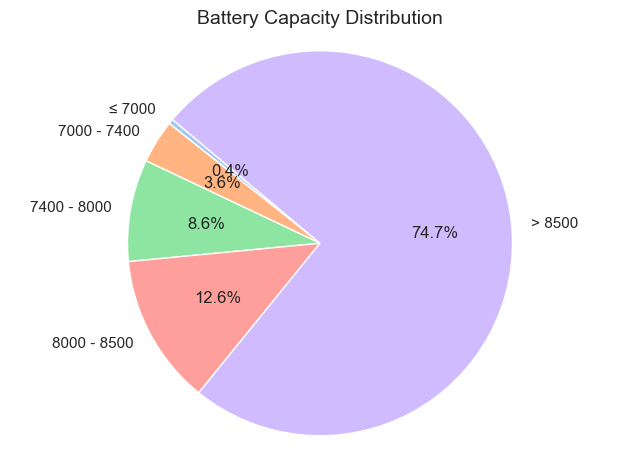

In [27]:
data = {
    'Bin': [1, 2, 3, 4, 5],
    'Capacity Range (mAh)': ['≤ 7000', '7000 - 7400', '7400 - 8000', '8000 - 8500', '> 8500'],
    'Number of Samples': [2, 17, 40, 59, 349]
}

df = pd.DataFrame(data)

# Create a pie chart using seaborn (seaborn doesn't directly support pie charts, so we use matplotlib for the plot but style with seaborn)
sns.set_theme(style="whitegrid")

fig, ax = plt.subplots()
colors = sns.color_palette("pastel", len(df))
ax.pie(df['Number of Samples'], labels=df['Capacity Range (mAh)'], autopct='%1.1f%%', colors=colors, startangle=140)
ax.set_title('Battery Capacity Distribution', fontsize=14)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

## 6. Baseline Model Selection <a id="model-selection"></a>

In [28]:
# Train and evaluate models using cross-validation
print("Training and evaluating models with cross-validation...")
model_trainer = ModelTrainer()
best_model_name, best_model, cv_results = model_trainer.cv_train_and_select(X_train_processed, y_train_processed)

print(f"\nCross-Validation Results:")
print("-" * 50)
cv_df = pd.DataFrame(cv_results).T
cv_df = cv_df.sort_values('cv_mean', ascending=False)
print(cv_df)

print(f"\n Best Model: {best_model_name}")
print(best_model)
print(f"Best CV Score: {cv_results[best_model_name]['cv_mean']:.4f}")


Training and evaluating models with cross-validation...

Cross-Validation Results:
--------------------------------------------------
         cv_mean
rf      0.665753
svr     0.648687
ridge   0.645425
lasso   0.610808
linear  0.262984

 Best Model: rf
RandomForestRegressor(random_state=42)
Best CV Score: 0.6658


## 7. Grid Search Hyperparameter Tuning <a id="grid-search"></a>

In [29]:
param_grid = {
    "n_estimators": [25, 50, 100],
    "max_depth": [3, 5, 7],
    "min_samples_split": [2,4, 6],
    "min_samples_leaf": [1,4],
}

print(f"Performing Grid Search for {best_model_name}...")
print(f"Parameter grid: {param_grid}")
print(f"Total combinations to test: {np.prod([len(v) for v in param_grid.values()])}")

# Perform grid search
optimized_model = model_trainer.grid_search_train(X_train_processed, y_train_processed, 
                                                  best_model, param_grid, cv=4)

print("\n✅ Grid Search completed!")


Performing Grid Search for rf...
Parameter grid: {'n_estimators': [25, 50, 100], 'max_depth': [3, 5, 7], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [1, 4]}
Total combinations to test: 54

✅ Grid Search completed!


## 8. Best Model Parameters Analysis

In [30]:
# Display best parameters from grid search
print("Best Model Parameters After Grid Search:")
print("=" * 60)

best_params = optimized_model.best_params_
for param, value in best_params.items():
    print(f"{param:<20}: {value}")

print(f"\nBest Cross-Validation Score: {optimized_model.best_score_:.4f}")
print(f"Score Improvement: {optimized_model.best_score_ - cv_results[best_model_name]['cv_mean']:.4f}")

# Get the best estimator
final_model = optimized_model.best_estimator_
print(f"\nFinal optimized model: {type(final_model).__name__}")


Best Model Parameters After Grid Search:
max_depth           : 7
min_samples_leaf    : 4
min_samples_split   : 2
n_estimators        : 100

Best Cross-Validation Score: 0.6672
Score Improvement: 0.0014

Final optimized model: RandomForestRegressor


## 9. Model Predictions <a id="evaluation"></a>

In [31]:
# Generate predictions for all datasets
print("Generating predictions...")

# Predictions on different sets
y_pred_train = final_model.predict(X_train_processed)
y_pred_test = final_model.predict(X_test_processed)
y_pred_all = final_model.predict(X_all_processed)

print(f"Training predictions shape: {y_pred_train.shape}")
print(f"Test predictions shape: {y_pred_test.shape}")
print(f"All data predictions shape: {y_pred_all.shape}")
print("Predictions generated successfully!")


Generating predictions...
Training predictions shape: (209,)
Test predictions shape: (90,)
All data predictions shape: (299,)
Predictions generated successfully!


## 10. Comprehensive Model Evaluation

In [34]:
# Create evaluators for different datasets
evaluator_train = Evaluator()
evaluator_test = Evaluator()
evaluator_all = Evaluator()

# Calculate metrics for each dataset
metrics_train = evaluator_train.calculate_metrics(y_train_processed, y_pred_train)
metrics_test = evaluator_test.calculate_metrics(y_test_processed, y_pred_test)
# metrics_all = evaluator_all.calculate_metrics(y_all_processed, y_pred_all)

print("Model Performance Comparison:")
print("=" * 70)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Training Set': metrics_train,
    'Test Set': metrics_test,
    # 'All Data': metrics_all
})

print(comparison_df.round(4))



Model Performance Comparison:
      Training Set     Test Set
MSE     56731.8542  139053.3469
RMSE      238.1845     372.8986
MAE       162.5568     271.9117
R2          0.8764       0.3866


## 11. Classification Metrics (F1 Score & Accuracy)

In [35]:
# Calculate classification metrics (F1 Score and Accuracy) for binned predictions
print("Classification Metrics Analysis:")
print("=" * 60)

# Calculate classification metrics for each dataset
datasets_pred = [
    ("Training Set", y_train_processed, y_pred_train, evaluator_train),
    ("Test Set", y_test_processed, y_pred_test, evaluator_test),
    # ("Complete Dataset", y_all_processed, y_pred_all, evaluator_all)
]

classification_results = {}

for name, y_true, y_pred, evaluator in datasets_pred:
    overall_metrics, bin_metrics = evaluator.evaluate_classification(y_true, y_pred)
    classification_results[name] = {'overall': overall_metrics, 'per_bin': bin_metrics}
    
    print(f"\n{name} Classification Results:")
    print("-" * 40)
    print("Overall Classification Metrics:")
    for metric, value in overall_metrics.items():
        print(f"  {metric:<15}: {value:.4f}")
        
    
    print("\n Per-bin Classification Metrics:")
    for bin_name, metrics in bin_metrics.items():
        print(f"  {bin_name}:")
        for metric, value in metrics.items():
            print(f"    {metric}: {value:.4f}")

# Create a summary comparison table for classification metrics
print(f"\n Classification Metrics Summary:")
print("=" * 70)

classification_summary = pd.DataFrame({
    'Training Set': [
        classification_results['Training Set']['overall']['accuracy'],
        classification_results['Training Set']['overall']['f1_macro'],
        classification_results['Training Set']['overall']['f1_weighted'],
        classification_results['Training Set']['overall']['kappa']
    ],
    'Test Set': [
        classification_results['Test Set']['overall']['accuracy'],
        classification_results['Test Set']['overall']['f1_macro'],
        classification_results['Test Set']['overall']['f1_weighted'],
        classification_results['Test Set']['overall']['kappa']
    ],
    # 'Complete Dataset': [
    #     classification_results['Complete Dataset']['overall']['accuracy'],
    #     classification_results['Complete Dataset']['overall']['f1_macro'],
    #     classification_results['Complete Dataset']['overall']['f1_weighted'],
    #     classification_results['Complete Dataset']['overall']['kappa']
    # ]
}, index=['Accuracy', 'F1 (Macro)', 'F1 (Weighted)', 'Cohen\'s Kappa'])

print(classification_summary.round(4))

# Analysis of classification performance
print(f"\n Classification Performance Analysis:")
print("-" * 50)

train_acc = classification_results['Training Set']['overall']['accuracy']
test_acc = classification_results['Test Set']['overall']['accuracy']
train_f1 = classification_results['Training Set']['overall']['f1_weighted']
test_f1 = classification_results['Test Set']['overall']['f1_weighted']



Classification Metrics Analysis:

Training Set Classification Results:
----------------------------------------
Overall Classification Metrics:
  accuracy       : 0.7847
  f1_macro       : 0.5537
  f1_weighted    : 0.7769
  kappa          : 0.6463

 Per-bin Classification Metrics:
  Bin 1:
    accuracy: 0.8235
    f1: 0.8000
  Bin 2:
    accuracy: 0.2857
    f1: 0.3478
  Bin 3:
    accuracy: 0.8544
    f1: 0.8263
  Bin 4:
    accuracy: 0.7838
    f1: 0.7945
  Bin 5:
    accuracy: 0.0000
    f1: 0.0000

Test Set Classification Results:
----------------------------------------
Overall Classification Metrics:
  accuracy       : 0.5667
  f1_macro       : 0.3933
  f1_weighted    : 0.5197
  kappa          : 0.1466

 Per-bin Classification Metrics:
  Bin 1:
    accuracy: 1.0000
    f1: 0.8889
  Bin 2:
    accuracy: 0.1429
    f1: 0.1667
  Bin 3:
    accuracy: 0.7925
    f1: 0.6885
  Bin 4:
    accuracy: 0.1600
    f1: 0.2222
  Bin 5:
    accuracy: 0.0000
    f1: 0.0000

 Classification Metric

## 12. Comprehensive Visualizations

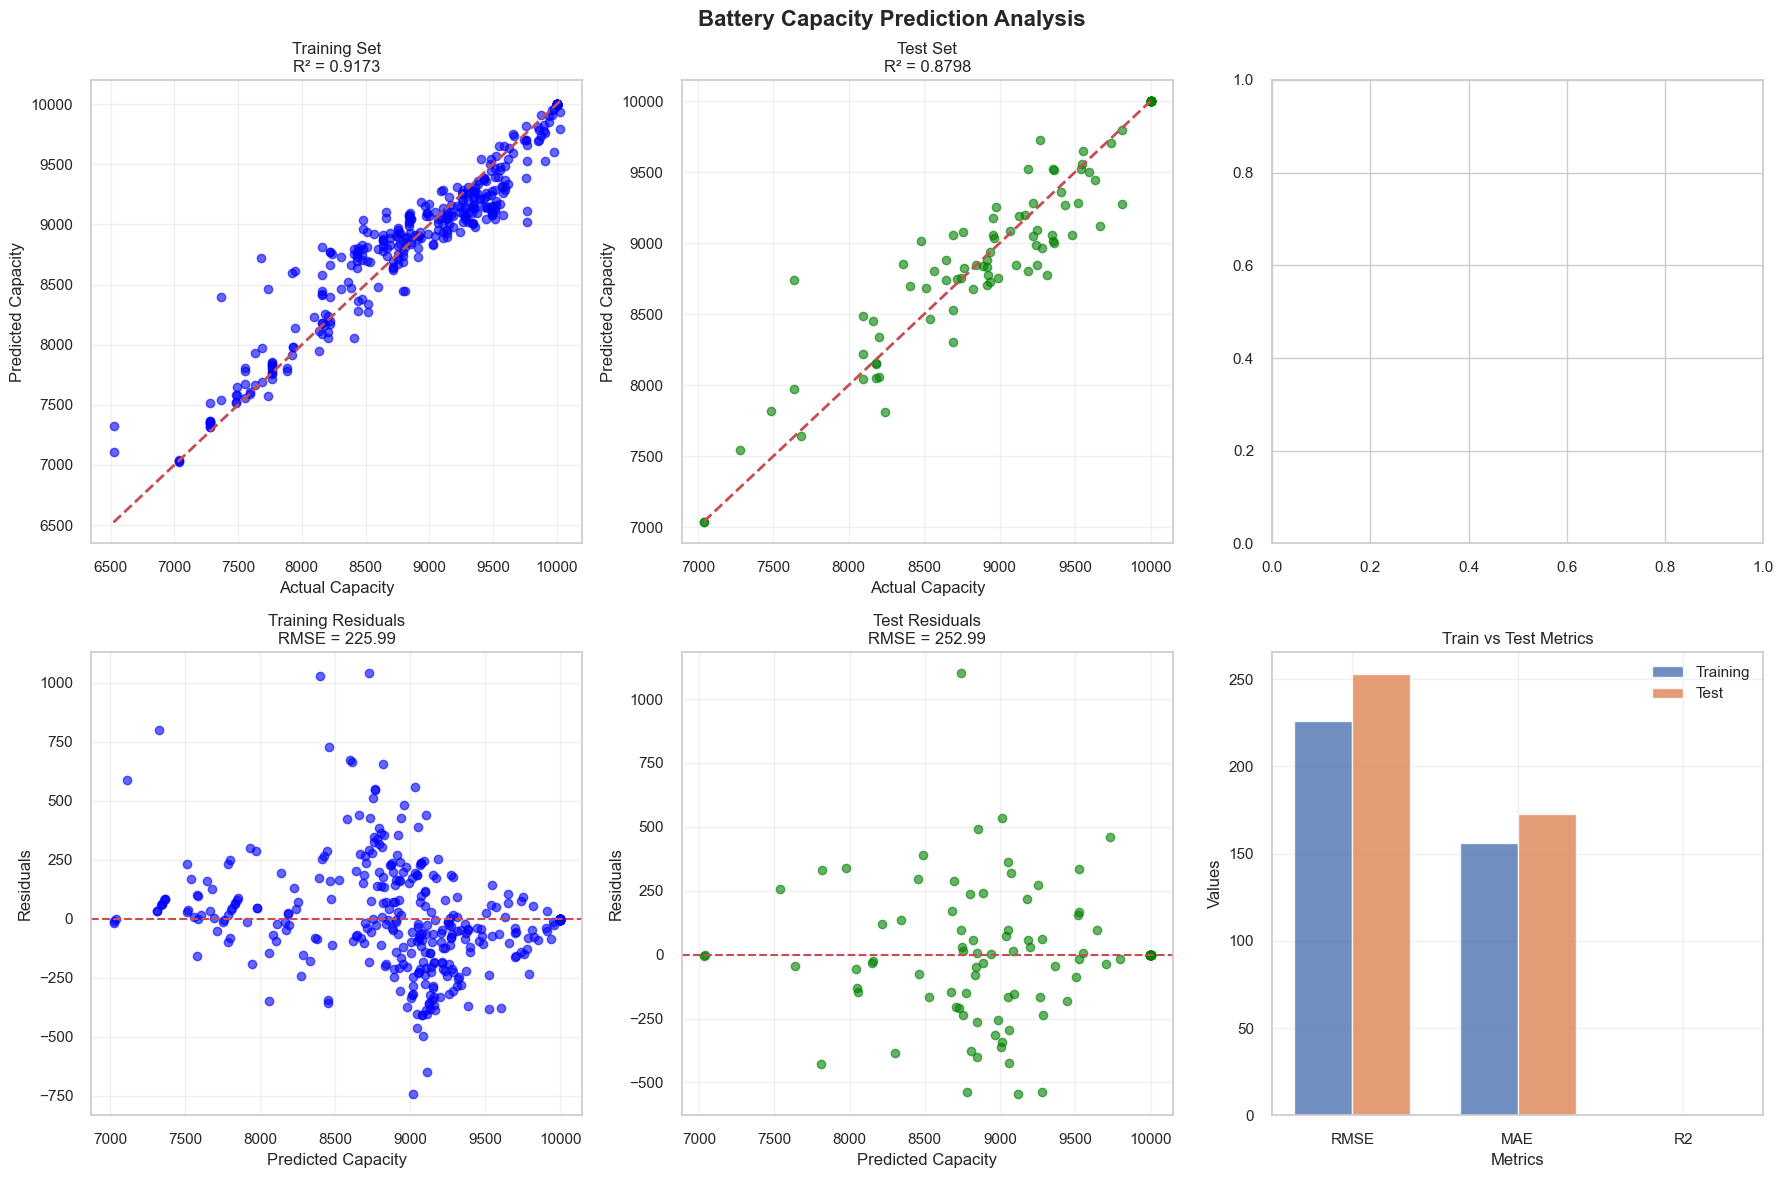

Comprehensive analysis plot saved to: /Users/amirbabamahmoudi/Documents/Battery-Capacity/results/comprehensive_analysis.png


In [27]:
# Create comprehensive visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Battery Capacity Prediction Analysis', fontsize=16, fontweight='bold')

# 1. Training Set: Predicted vs Actual
axes[0, 0].scatter(y_train_processed, y_pred_train, alpha=0.6, color='blue')
axes[0, 0].plot([y_train_processed.min(), y_train_processed.max()], 
                [y_train_processed.min(), y_train_processed.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Capacity')
axes[0, 0].set_ylabel('Predicted Capacity')
axes[0, 0].set_title(f'Training Set\nR² = {metrics_train["R2"]:.4f}')
axes[0, 0].grid(True, alpha=0.3)

# 2. Test Set: Predicted vs Actual
axes[0, 1].scatter(y_test_processed, y_pred_test, alpha=0.6, color='green')
axes[0, 1].plot([y_test_processed.min(), y_test_processed.max()], 
                [y_test_processed.min(), y_test_processed.max()], 'r--', lw=2)
axes[0, 1].set_xlabel('Actual Capacity')
axes[0, 1].set_ylabel('Predicted Capacity')
axes[0, 1].set_title(f'Test Set\nR² = {metrics_test["R2"]:.4f}')
axes[0, 1].grid(True, alpha=0.3)



# 3. Training Set: Residuals
residuals_train = y_pred_train - y_train_processed
axes[1, 0].scatter(y_pred_train, residuals_train, alpha=0.6, color='blue')
axes[1, 0].axhline(y=0, color='r', linestyle='--')
axes[1, 0].set_xlabel('Predicted Capacity')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title(f'Training Residuals\nRMSE = {metrics_train["RMSE"]:.2f}')
axes[1, 0].grid(True, alpha=0.3)

# 5. Test Set: Residuals
residuals_test = y_pred_test - y_test_processed
axes[1, 1].scatter(y_pred_test, residuals_test, alpha=0.6, color='green')
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Capacity')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].set_title(f'Test Residuals\nRMSE = {metrics_test["RMSE"]:.2f}')
axes[1, 1].grid(True, alpha=0.3)

# 6. Metrics Comparison
metrics_comparison = ['RMSE', 'MAE', 'R2']
train_values = [metrics_train[m] for m in metrics_comparison]
test_values = [metrics_test[m] for m in metrics_comparison]

x = np.arange(len(metrics_comparison))
width = 0.35

axes[1, 2].bar(x - width/2, train_values, width, label='Training', alpha=0.8)
axes[1, 2].bar(x + width/2, test_values, width, label='Test', alpha=0.8)
axes[1, 2].set_xlabel('Metrics')
axes[1, 2].set_ylabel('Values')
axes[1, 2].set_title('Train vs Test Metrics')
axes[1, 2].set_xticks(x)
axes[1, 2].set_xticklabels(metrics_comparison)
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(results_dir / "comprehensive_analysis.png", dpi=300, bbox_inches='tight')
plt.show()

print(f"Comprehensive analysis plot saved to: {results_dir / 'comprehensive_analysis.png'}")



## 13. Model Performance Summary

In [28]:
# Create a comprehensive summary
print(" MODEL PERFORMANCE SUMMARY")
print("=" * 80)

print(f" Best Model: {best_model_name.upper()} (Gradient Boosting Regressor)")
print(f" Optimization: Grid Search with {len(param_grid)} parameters")
print(f" Dataset: {len(X)} samples, {X.shape[1]} features")
print(f" Train/Test Split: {len(X_train)}/{len(X_test)} samples ({80}/{20}%)")

print("\n PERFORMANCE METRICS:")
print("-" * 50)
performance_summary = pd.DataFrame({
    'Training': [f"{metrics_train['RMSE']:.2f}", f"{metrics_train['MAE']:.2f}", 
                f"{metrics_train['R2']:.4f}", f"{metrics_train['MSE']:.2f}"],
    'Test': [f"{metrics_test['RMSE']:.2f}", f"{metrics_test['MAE']:.2f}", 
            f"{metrics_test['R2']:.4f}", f"{metrics_test['MSE']:.2f}"],
    'Difference': [f"{metrics_train['RMSE'] - metrics_test['RMSE']:.2f}", 
                  f"{metrics_train['MAE'] - metrics_test['MAE']:.2f}",
                  f"{metrics_train['R2'] - metrics_test['R2']:.4f}",
                  f"{metrics_train['MSE'] - metrics_test['MSE']:.2f}"]
}, index=['RMSE', 'MAE', 'R²', 'MSE'])

print(performance_summary)

print("\n  OPTIMIZED PARAMETERS:")
print("-" * 30)
for param, value in best_params.items():
    print(f"{param:<20}: {value}")

print(f"\n Results saved in: {results_dir}")
print(f" Models saved in: {models_dir}")


 MODEL PERFORMANCE SUMMARY
 Best Model: RF (Gradient Boosting Regressor)
 Optimization: Grid Search with 4 parameters
 Dataset: 467 samples, 138 features
 Train/Test Split: 373/94 samples (80/20%)

 PERFORMANCE METRICS:
--------------------------------------------------
      Training      Test Difference
RMSE    225.99    252.99     -27.00
MAE     156.27    172.92     -16.65
R²      0.9173    0.8798     0.0375
MSE   51070.91  64004.72  -12933.81

  OPTIMIZED PARAMETERS:
------------------------------
max_depth           : 7
min_samples_leaf    : 1
min_samples_split   : 4
n_estimators        : 50

 Results saved in: /Users/amirbabamahmoudi/Documents/Battery-Capacity/results
 Models saved in: /Users/amirbabamahmoudi/Documents/Battery-Capacity/models


## 14. Save Models and Results <a id="saving"></a>

In [29]:
# Save the optimized model and preprocessor
print(" Saving models and results...")

# Save the final optimized model
joblib.dump(final_model, models_dir / f"best_model_{best_model_name}_optimized.joblib")
joblib.dump(preprocessor, models_dir / "preprocessor.joblib")

# Save the grid search results
joblib.dump(optimized_model, models_dir / "grid_search_results.joblib")

# Save performance metrics
results_summary = {
    'model_name': best_model_name,
    'best_parameters': best_params,
    'cv_score': optimized_model.best_score_,
    'train_metrics': metrics_train,
    'test_metrics': metrics_test,
    # 'all_metrics': metrics_all,
    'classification_results': classification_results
}

joblib.dump(results_summary, results_dir / "performance_summary.joblib")

# Save metrics as CSV for easy analysis
comparison_df.to_csv(results_dir / "metrics_comparison.csv")

print("All models and results saved successfully!")
print("\ Saved files:")
print(f"  - {models_dir / f'best_model_{best_model_name}_optimized.joblib'}")
print(f"  - {models_dir / 'preprocessor.joblib'}")
print(f"  - {models_dir / 'grid_search_results.joblib'}")
print(f"  - {results_dir / 'performance_summary.joblib'}")
print(f"  - {results_dir / 'metrics_comparison.csv'}")
print(f"  - {results_dir / 'comprehensive_analysis.png'}")


 Saving models and results...
All models and results saved successfully!
\ Saved files:
  - /Users/amirbabamahmoudi/Documents/Battery-Capacity/models/best_model_rf_optimized.joblib
  - /Users/amirbabamahmoudi/Documents/Battery-Capacity/models/preprocessor.joblib
  - /Users/amirbabamahmoudi/Documents/Battery-Capacity/models/grid_search_results.joblib
  - /Users/amirbabamahmoudi/Documents/Battery-Capacity/results/performance_summary.joblib
  - /Users/amirbabamahmoudi/Documents/Battery-Capacity/results/metrics_comparison.csv
  - /Users/amirbabamahmoudi/Documents/Battery-Capacity/results/comprehensive_analysis.png
